# Check output for 1_H_07 SCARF Test

---
> This is a **simulation of the CERN Proton Synchrotron (PS) Machine Development (MD)4224 in 2018: Space Charge Injection Study**
>
> - Injection at 1.4 GeV, single turn, bucket to bucket
> - Longitudinal distribution generated from Tomoscope measurement (same for both sims)
> - First 2200 turns
> - Working point at extreme horizontal tune of $(Q_x, Q_y)$ = (6.07, 6.24)
> - Initial RMS emittances $\epsilon_x = \epsilon_y$ = 1 mm mrad
> - Expect space charge emittance growth due to quadrupolar resonance being driven by low energy quads, used to set tune, and not symmetrically distributed around the very periodic PS

#### Imports

In [1]:
import os
import glob
#import imageio
#import pickle
#import pandas as pd
import numpy as np
#import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
#from matplotlib.patches import Patch
#from scipy.optimize import curve_fit

#### Matplotlib Plot Parameters

In [2]:
plt.rcParams['figure.figsize'] = [9.0, 8.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 12

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 8

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

#### Functions

In [3]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)

def check_if_file_exists(name):
    ret_val = False
    if os.path.isfile(name):
        print (name, ' exists')
        ret_val = True
    return ret_val
    
def is_non_zero_file(fpath):  
        print ('\n\t\t\tis_non_zero_file:: Checking file ', fpath)
        print ('\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath))
        print ('\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath))
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [4]:
def add_input_file(dd, filename, label):
    f = filename
    p = dict()
    sio.loadmat(f, mdict=p)
    dd[label] = p	
    print ('\tAdded output data from ', filename, '\t dictionary key: ', label)
    return dd

In [5]:
def make_directory(path):
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)  

#### Read File

In [6]:
dd1 = dict()
dd1 = add_input_file(dd1, '1_H_07/output/output.mat', 'STFC SCARF')
dd1 = add_input_file(dd1, '../../MD4224_Light/06_Full_Simulation_Scan_Tomo/1_H_07/output/output.mat', 'CERN HPC-Batch')

	Added output data from  1_H_07/output/output.mat 	 dictionary key:  STFC SCARF
	Added output data from  ../../MD4224_Light/06_Full_Simulation_Scan_Tomo/1_H_07/output/output.mat 	 dictionary key:  CERN HPC-Batch


In [7]:
dd1['STFC SCARF'].keys()

dict_keys(['__header__', '__version__', '__globals__', 'eps_z', 'D_x', 'D_y', 'mu_y', 'kurtosis_yp_6sig', 'kurtosis_yp', 'kurtosis_y', 'intensity', 'mu_yp', 'kurtosis_z_6sig', 'min_yp', 'cumulative_time', 'eff_beta_y', 'eff_beta_x', 'kurtosis_y_6sig', 'kurtosis_x', 'min_x', 'mu_z', 'epsn_y', 'epsn_x', 'beta_y', 'beta_x', 'max_xp', 'mean_yp', 'sig_dE', 'dpp_rms', 'kurtosis_xp', 'eff_epsn_y', 'eff_epsn_x', 'mean_x', 'mean_y', 'mean_z', 'min_dE', 'kurtosis_x_6sig', 'max_z', 'mu_dE', 'max_x', 'max_y', 'n_mp', 'mean_dE', 'min_y', 'kurtosis_xp_6sig', 'sig_yp', 'sig_y', 'sig_x', 'min_xp', 'max_yp', 'kurtosis_z', 'eff_alpha_x', 'eff_alpha_y', 'mu_xp', 'turn_time', 'alpha_x', 'alpha_y', 'mean_xp', 'bunchlength', 'turn_duration', 'sig_z', 'kurtosis_dE', 'mu_x', 'turn', 'sig_xp', 'max_dE', 'kurtosis_dE_6sig', 'min_z', 'gamma'])

In [8]:
save_folder = '1_H_07_Plots'
make_directory(save_folder)

Creation of the directory 1_H_07_Plots failed


#### Setup Plots Labels / Titles

In [9]:
sc = 'SbS'
legend_label1 = r'$Q_x$'  
legend_label2 = r'$Q_y$'   
main_label = 'PyORBIT SCARF Test'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255

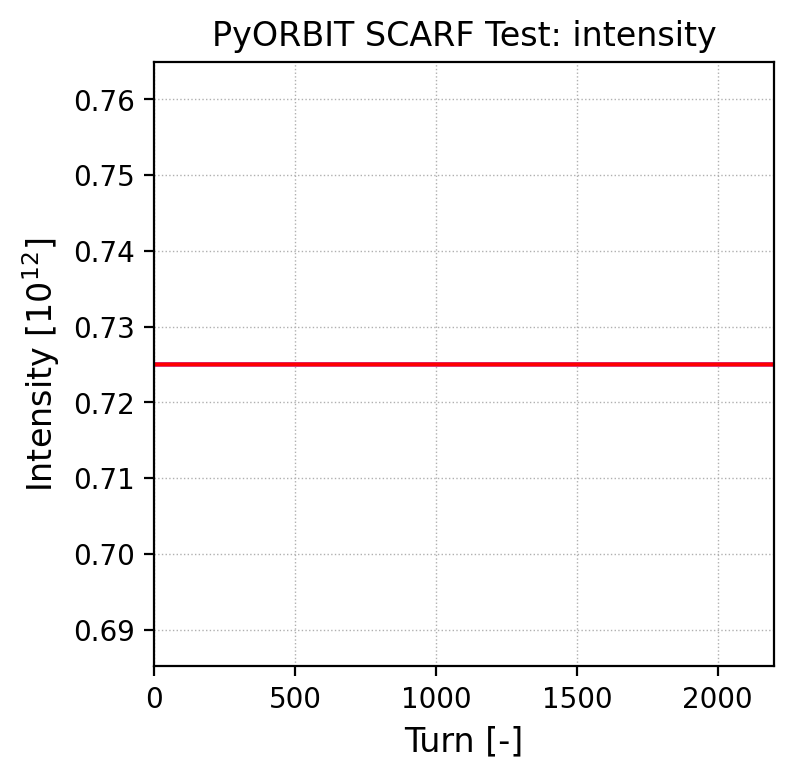

In [10]:
parameter = 'intensity'
multi1 = 1E-12
y_label = r'Intensity [$10^{12}$]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

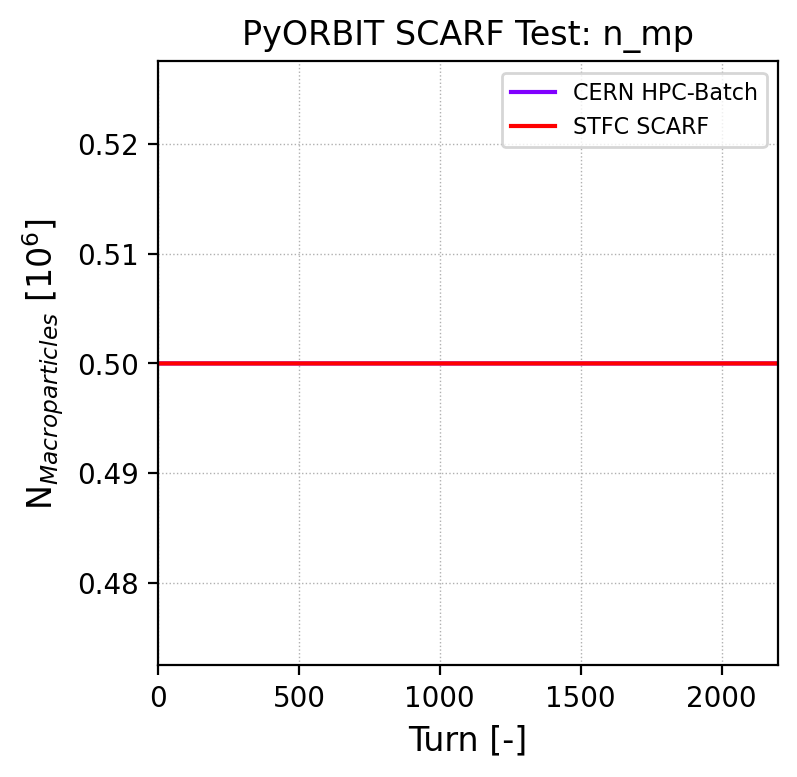

In [11]:
parameter = 'n_mp'
multi1 = 1E-6
y_label = r'N$_{Macroparticles}$ [$10^{6}$]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

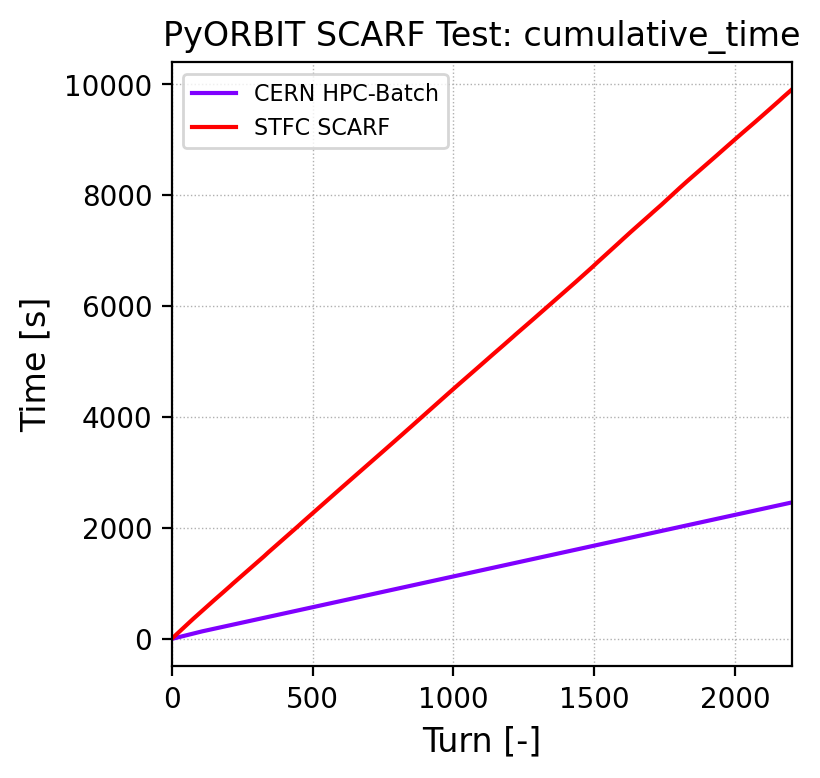

In [12]:
parameter = 'cumulative_time'
multi1 = 1./60.
y_label = 'Time [s]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

In [13]:
average_SCARF_turn = np.mean(dd1['STFC SCARF']['turn_duration'][0])
average_SCARF_turn

269.31115658529126

In [14]:
average_HPC_Batch_turn = np.mean(dd1['CERN HPC-Batch']['turn_duration'][0])
average_HPC_Batch_turn

66.51627951467758

In [15]:
average_SCARF_turn/average_HPC_Batch_turn

4.048800662789095

## SCARF PyORBIT is 4 times slower than HPC-Batch PyORBIT

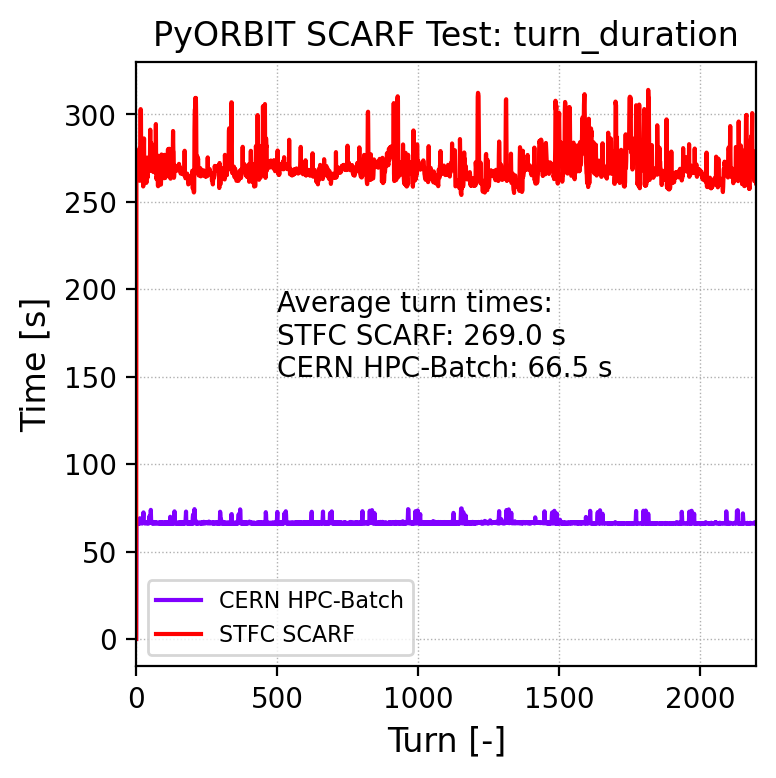

In [16]:
parameter = 'turn_duration'
multi1 = 1
y_label = 'Time [s]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       

text_ = 'Average turn times:\nSTFC SCARF: '+str(round_sig(average_SCARF_turn))+' s\nCERN HPC-Batch: '+str(round_sig(average_HPC_Batch_turn))+' s'   
plt.text(500., 150., text_)
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

In [17]:
average_SCARF_turn = np.mean(dd1['STFC SCARF']['turn_duration'][0])
average_SCARF_turn

269.31115658529126

In [18]:
average_HPC_Batch_turn = np.mean(dd1['CERN HPC-Batch']['turn_duration'][0])
average_HPC_Batch_turn

66.51627951467758

In [19]:
average_SCARF_turn/average_HPC_Batch_turn

4.048800662789095

## SCARF PyORBIT is 4 times slower than HPC-Batch PyORBIT

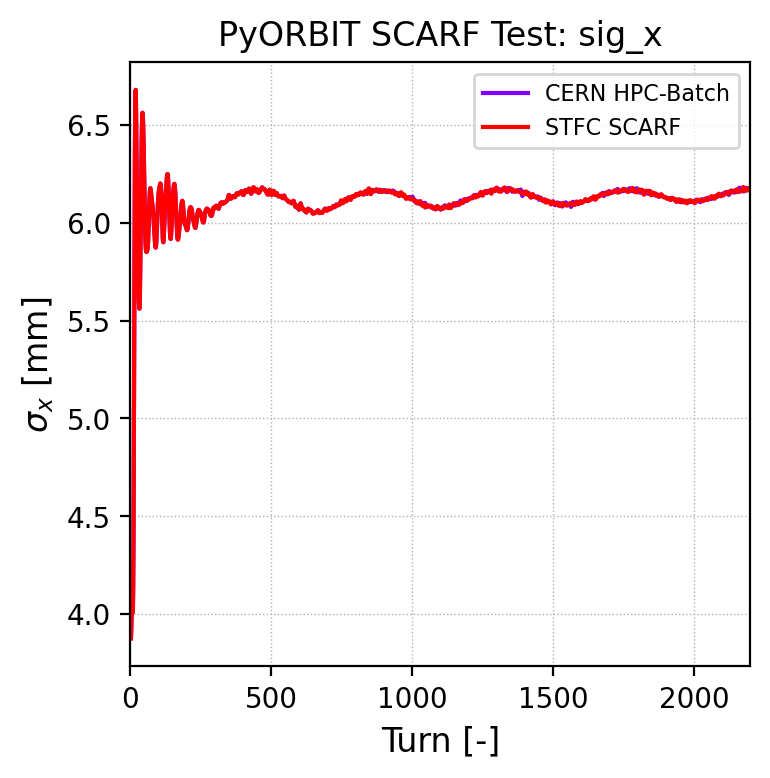

In [20]:
parameter = 'sig_x'
multi1 = 1E3
y_label = r'$\sigma_x$ [mm]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

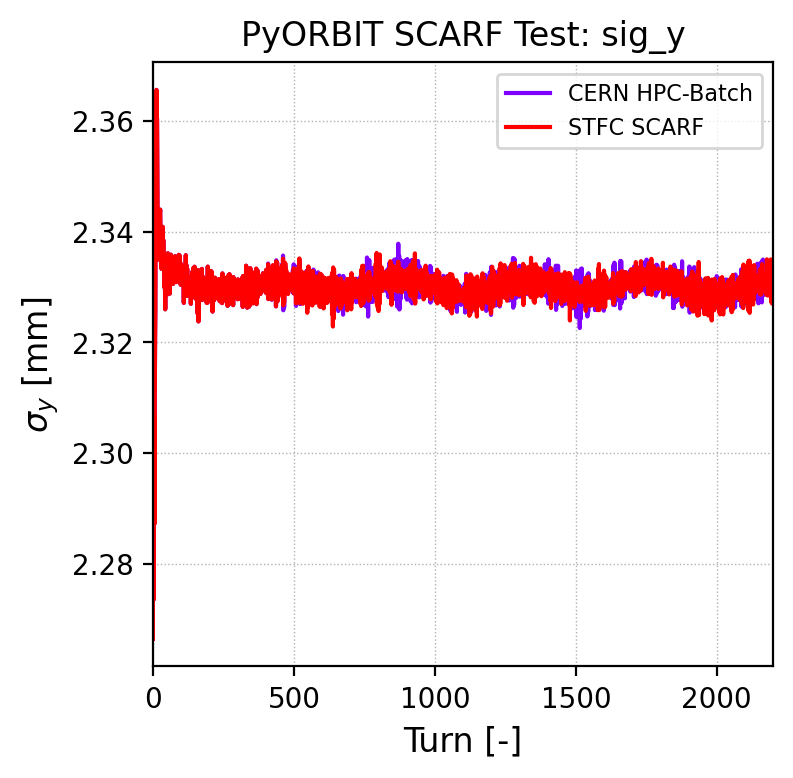

In [21]:
parameter = 'sig_y'
multi1 = 1E3
y_label = r'$\sigma_y$ [mm]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

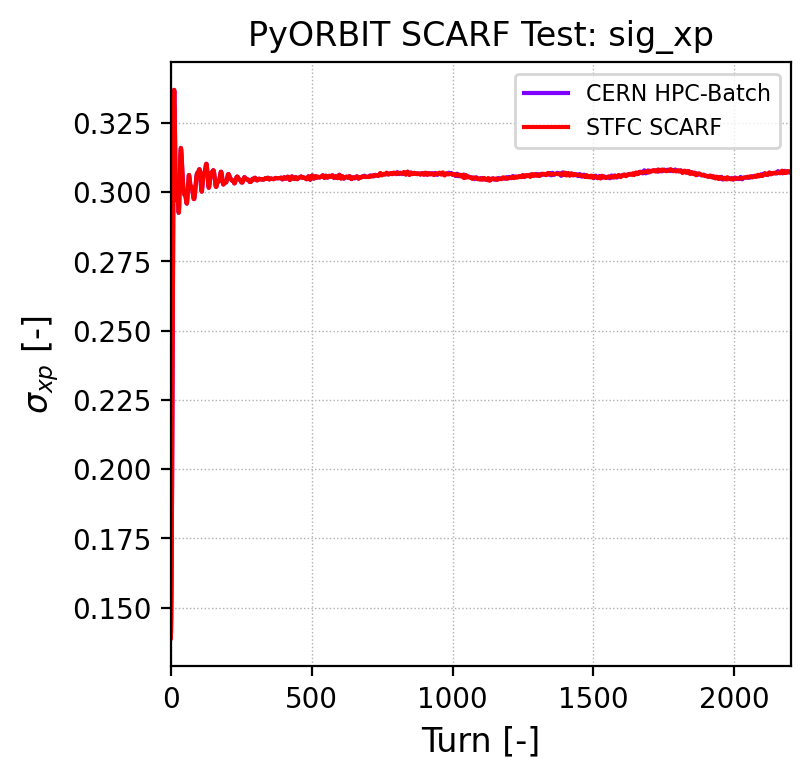

In [22]:
parameter = 'sig_xp'
multi1 = 1E3
y_label = r'$\sigma_{xp}$ [-]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

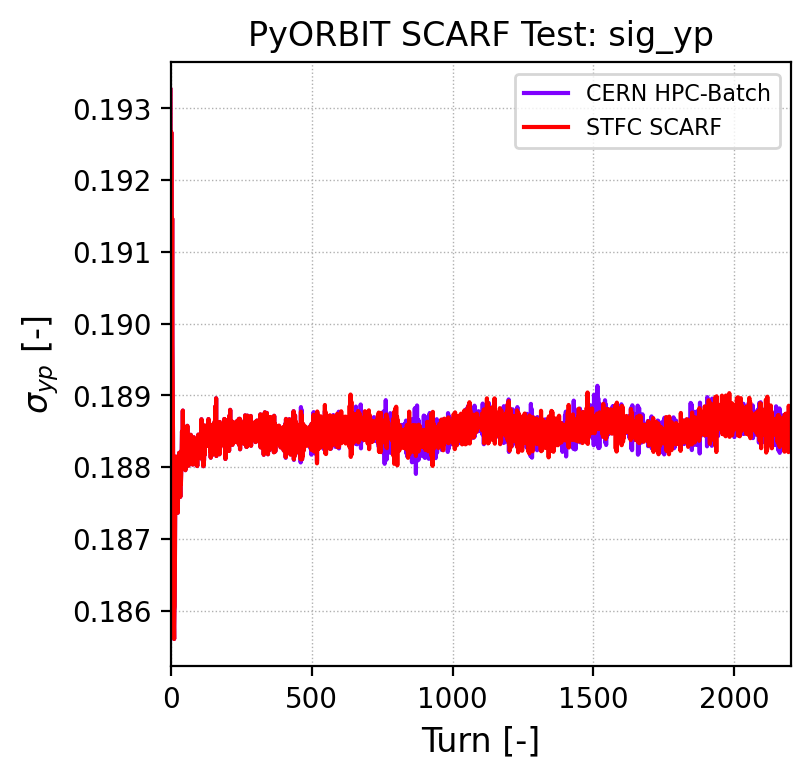

In [23]:
parameter = 'sig_yp'
multi1 = 1E3
y_label = r'$\sigma_{yp}$ [-]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

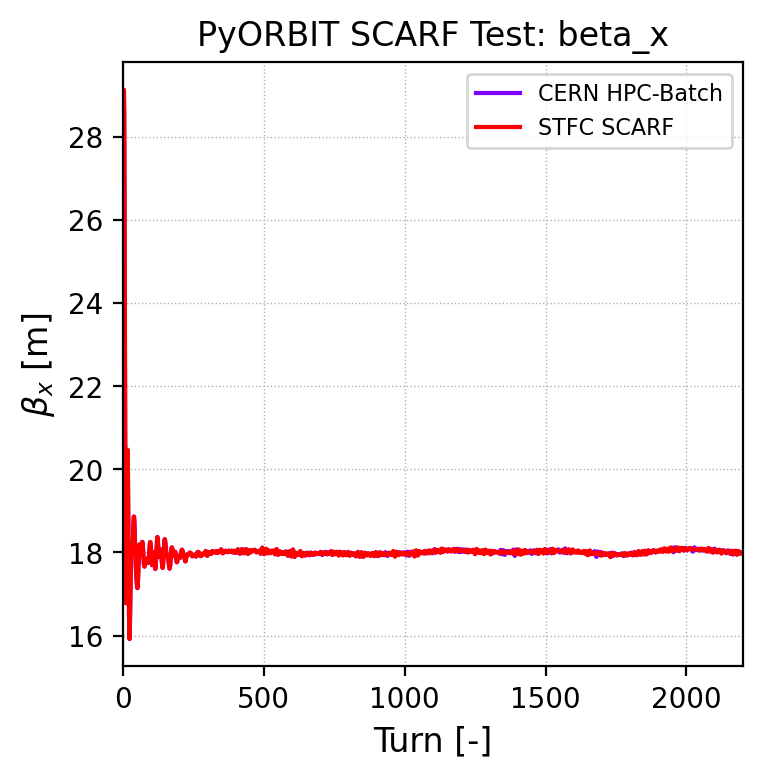

In [24]:
parameter = 'beta_x'
multi1 = 1
y_label = r'$\beta_x$ [m]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

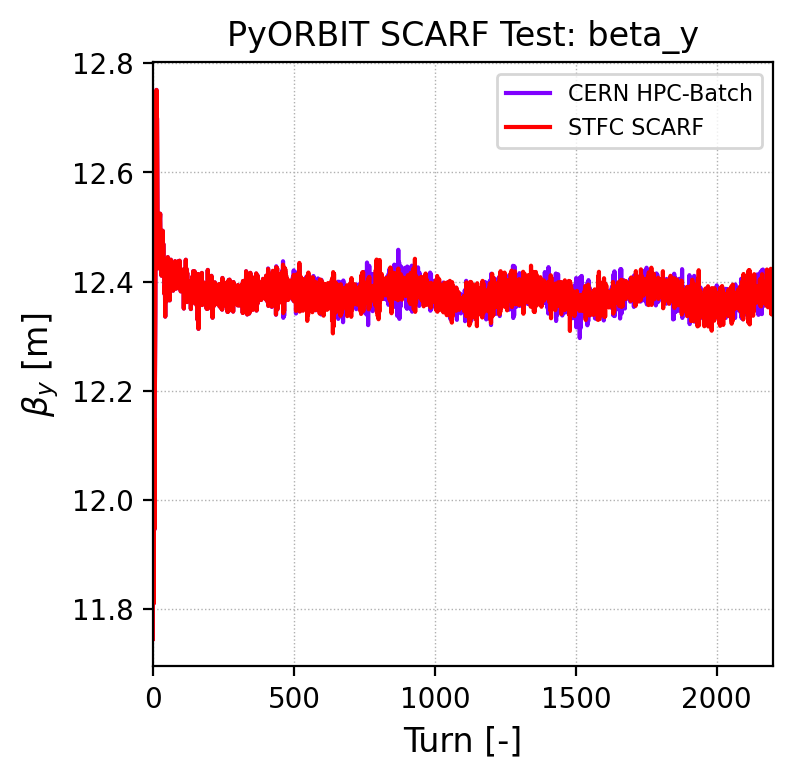

In [25]:
parameter = 'beta_y'
multi1 = 1
y_label = r'$\beta_y$ [m]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

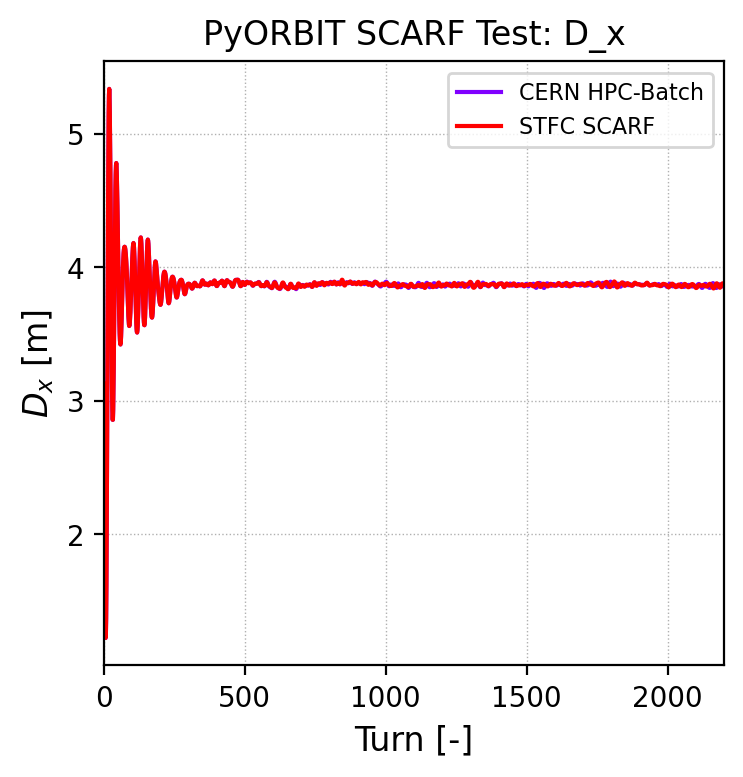

In [26]:
parameter = 'D_x'
multi1 = 1
y_label = r'$D_x$ [m]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

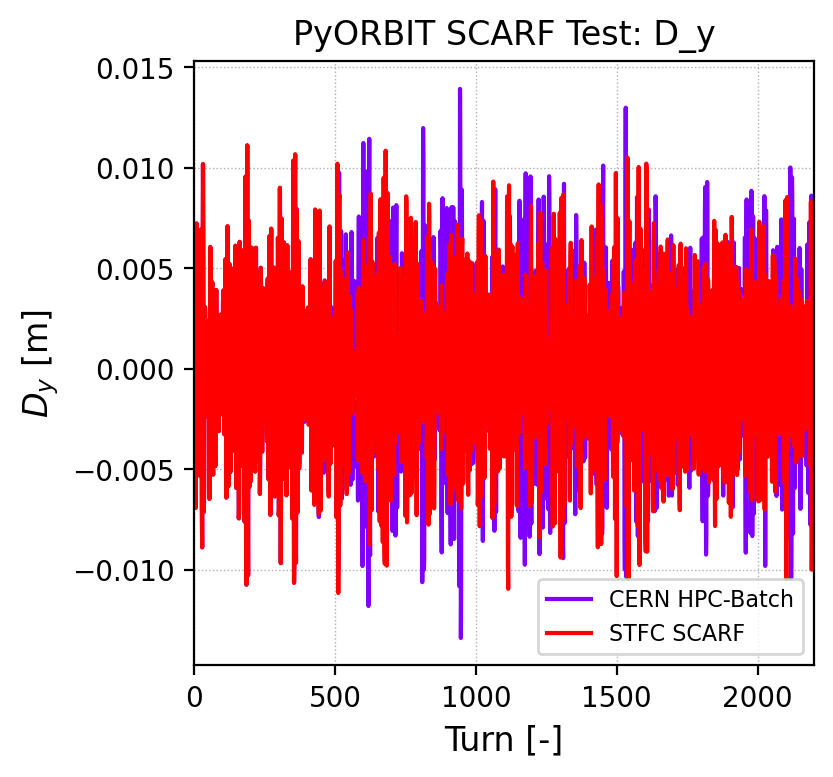

In [27]:
parameter = 'D_y'
multi1 = 1
y_label = r'$D_y$ [m]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

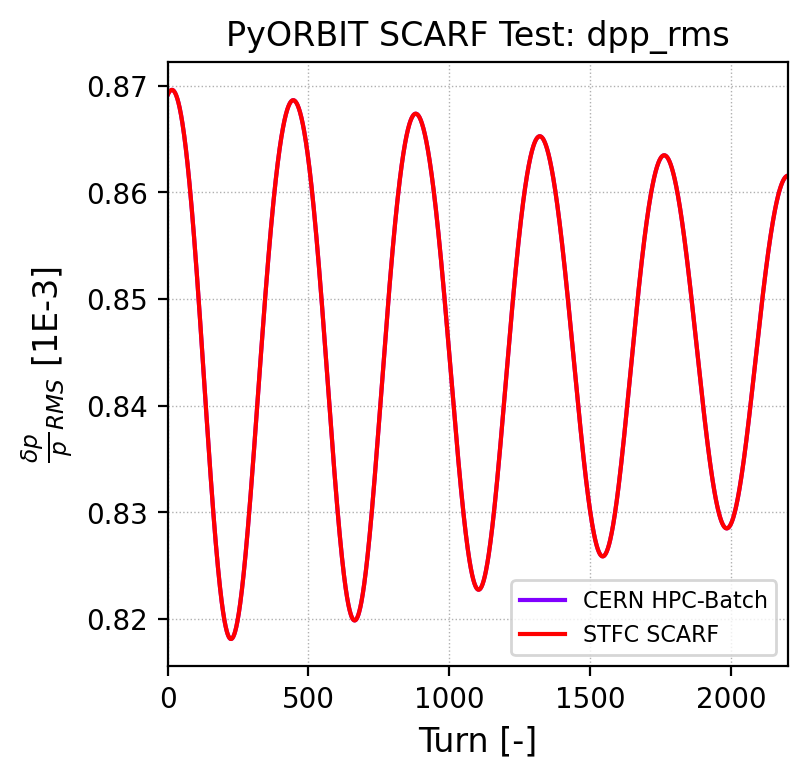

In [28]:
parameter = 'dpp_rms'
multi1 = 1E3
y_label = r'$\frac{\delta p}{p}_{RMS}$ [1E-3]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

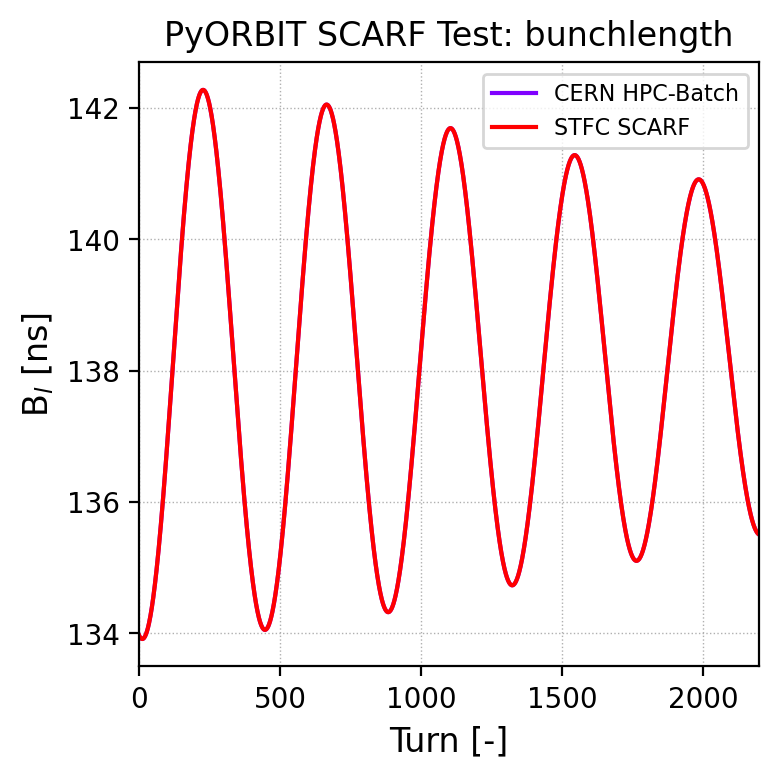

In [29]:
parameter = 'bunchlength'
multi1 = 1E9
y_label = r'B$_l$ [ns]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

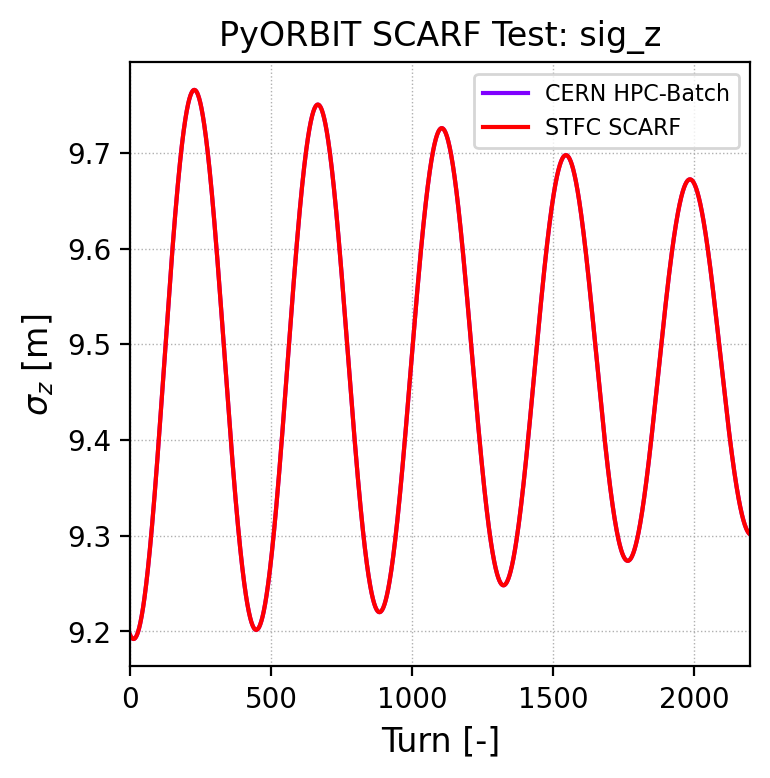

In [30]:
parameter = 'sig_z'
multi1 = 1
y_label = r'$\sigma_z$ [m]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

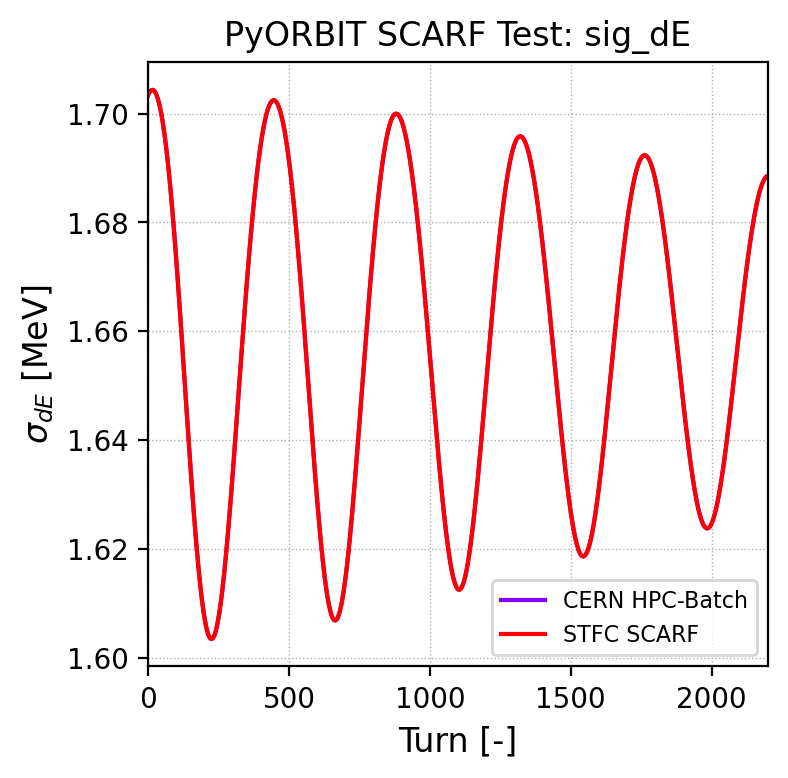

In [31]:
parameter = 'sig_dE'
multi1 = 1E3
y_label = r'$\sigma_{dE}$ [MeV]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

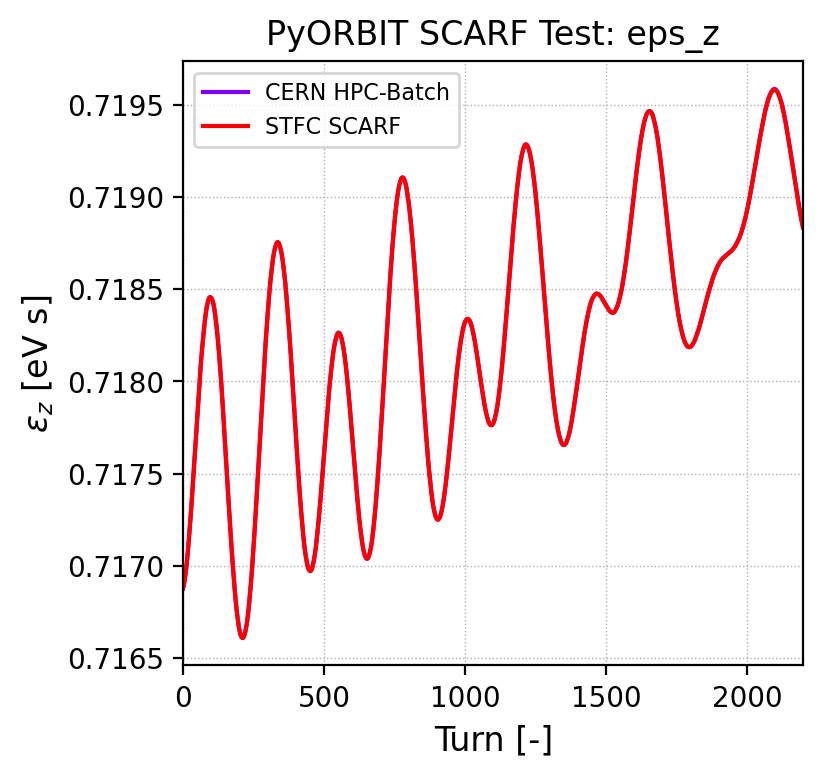

In [32]:
parameter = 'eps_z'
multi1 = 1
y_label = r'$\epsilon_z$ [eV s]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

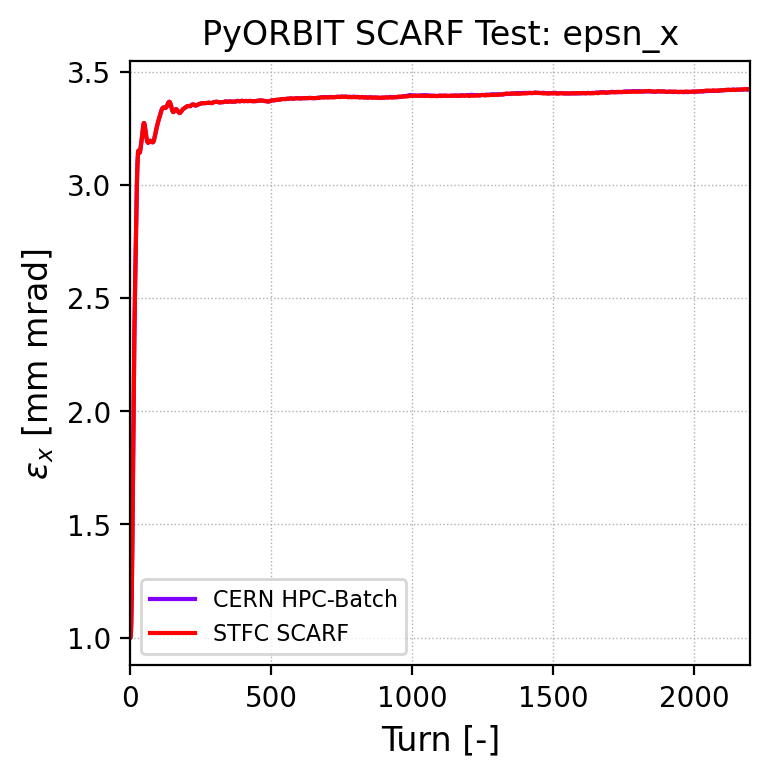

In [33]:
parameter = 'epsn_x'
multi1 = 1E6
y_label = r'$\epsilon_x$ [mm mrad]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

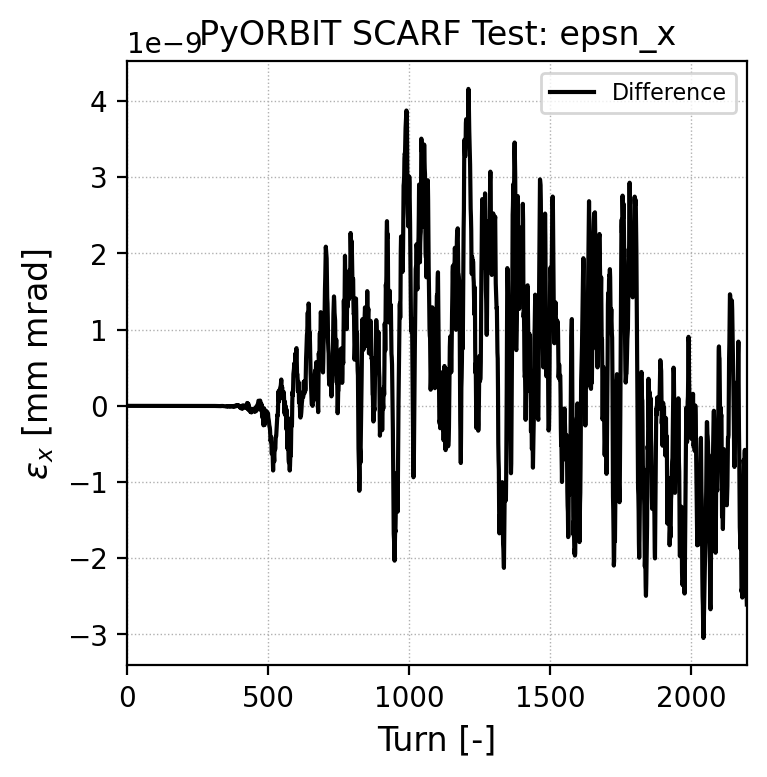

In [34]:
parameter = 'epsn_x'
multi1 = 1E6
y_label = r'$\epsilon_x$ [mm mrad]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

x_dat = dd1['STFC SCARF']['turn'][0]
y_dat = dd1['CERN HPC-Batch'][parameter][0] - dd1['STFC SCARF'][parameter][0]

ax1.plot(x_dat, y_dat,color='k', label='Difference');
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '_diff.png'
plt.savefig(savename);

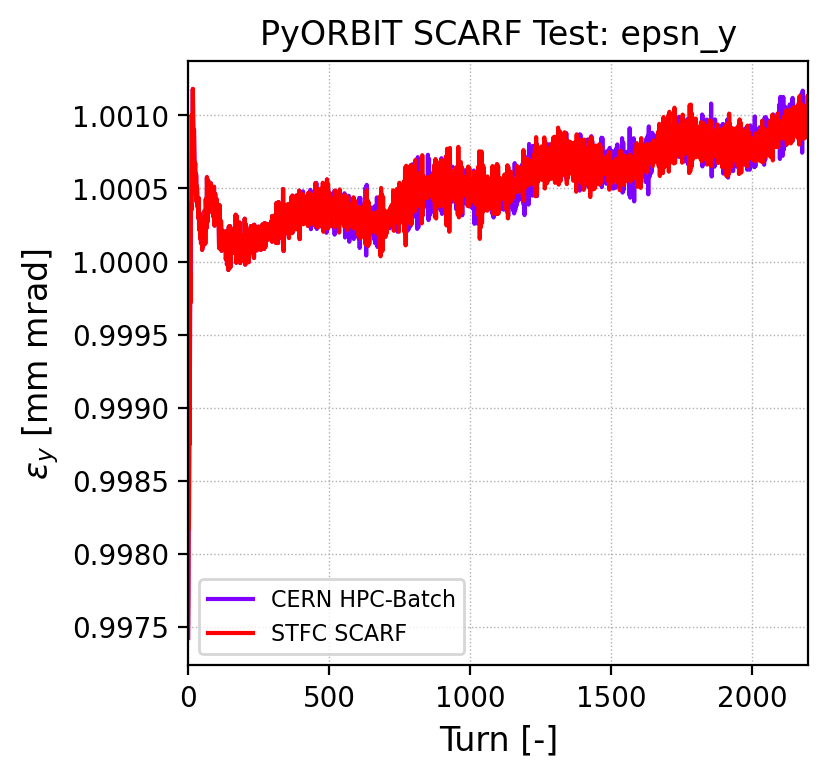

In [35]:
parameter = 'epsn_y'
multi1 = 1E6
y_label = r'$\epsilon_y$ [mm mrad]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items()):
    ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
    c_it = c_it + 1;       
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename);

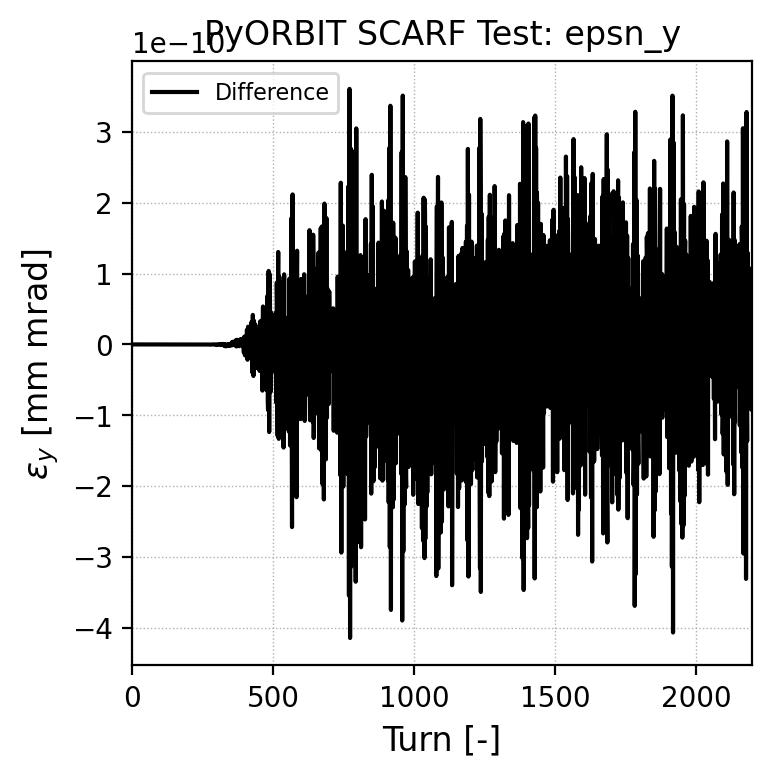

In [36]:
parameter = 'epsn_y'
multi1 = 1E6
y_label = r'$\epsilon_y$ [mm mrad]'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(4.,4.))
ax1 = fig1.add_subplot(111)

title = main_label + ': ' + parameter
ax1.set_title(title)

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(y_label)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

x_dat = dd1['STFC SCARF']['turn'][0]
y_dat = dd1['CERN HPC-Batch'][parameter][0] - dd1['STFC SCARF'][parameter][0]

ax1.plot(x_dat, y_dat,color='k', label='Difference');
    
ax1.grid(which='both',lw=0.5, ls=':');
ax1.legend();
ax1.set_xlim(0, 2200);
    
savename = save_folder +'/' + main_label + '_' + parameter + '_diff.png'
plt.savefig(savename);

### Conclusions
---
- PyORBIT successfully installed on SCARF
- Simulation results agree with past HPC-Batch run
- SCARF 4 times slower than HPC-Batch